# Tu primer random forest con scikit-learn

In [91]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [92]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv('pima-indians-diabetes.csv',sep=',')

## Exploración de datos

In [93]:
#Visualizacion del dataframe
df_diabetes.sample(10) # Muestreo aleatorio de 10 registros

,6,148,72,35,0,33.6,0.627,50,1
139,3,128,78,0,0,21.1,0.268,55,0
328,6,105,70,32,68,30.8,0.122,37,0
6,10,115,0,0,0,35.3,0.134,29,0
392,4,116,72,12,87,22.1,0.463,37,0
202,2,99,70,16,44,20.4,0.235,27,0
15,0,118,84,47,230,45.8,0.551,31,1
271,3,122,78,0,0,23.0,0.254,40,0
213,9,112,82,32,175,34.2,0.260,36,1
138,5,105,72,29,325,36.9,0.159,28,0
621,6,183,94,0,0,40.8,1.461,45,0


In [94]:
#Renombramos las columnas
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [95]:
#Verificacion de datos
df_diabetes.sample(10)

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
216,6,125,68,30,120,30.0,0.464,32,0
87,15,136,70,32,110,37.1,0.153,43,1
415,1,97,68,21,0,27.2,1.095,22,0
380,0,105,68,22,0,20.0,0.236,22,0
178,5,130,82,0,0,39.1,0.956,37,1
715,3,173,78,39,185,33.8,0.970,31,1
706,2,127,46,21,335,34.4,0.176,22,0
332,12,106,80,0,0,23.6,0.137,44,0
317,3,115,66,39,140,38.1,0.150,28,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [96]:
#Analizamos el shape del objeto
print(df_diabetes.shape)

(767, 9)


In [97]:
#Visualizamos los tipos de datos
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   1. Number of times pregnant                                                  767 non-null    int64  
 1   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  767 non-null    int64  
 2   3. Diastolic blood pressure (mm Hg)                                          767 non-null    int64  
 3   4. Triceps skin fold thickness (mm)                                          767 non-null    int64  
 4   5. 2-Hour serum insulin (mu U/ml)                                            767 non-null    int64  
 5   6. Body mass index (weight in kg/(height in m)^2)                            767 non-null    float64
 6   7. Diabetes pedigree function              

In [98]:
# Cantidad de valores nulos
df_diabetes.isnull().sum()

1. Number of times pregnant                                                    0
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
3. Diastolic blood pressure (mm Hg)                                            0
4. Triceps skin fold thickness (mm)                                            0
5. 2-Hour serum insulin (mu U/ml)                                              0
6. Body mass index (weight in kg/(height in m)^2)                              0
7. Diabetes pedigree function                                                  0
8. Age (years)                                                                 0
9. Class variable (0 or 1)                                                     0
dtype: int64

Parece que no existen valores nulos porque no están codificados como Nan, pero corresponden a registros con cero, quiere decir que no se tomó la muestra

In [99]:
df_diabetes.iloc[:,1:6].replace(to_replace=[0],value=np.nan).isna().sum().reset_index(name='missing_values').rename(columns={'index':'variable'}).assign(percentage = lambda df_reset: df_reset.missing_values/len(df_diabetes)*100)


,variable,missing_values,percentage
0,2. Plasma glucose concentration a 2 hours in a...,5,0.651890
1,3. Diastolic blood pressure (mm Hg),35,4.563233
2,4. Triceps skin fold thickness (mm),227,29.595828
3,5. 2-Hour serum insulin (mu U/ml),373,48.631030
4,6. Body mass index (weight in kg/(height in m)^2),11,1.434159


In [100]:
# Resumen estadistico de los features 
df_diabetes.describe()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [101]:
# Proporción de los target
df_diabetes['9. Class variable (0 or 1)'].value_counts()

9. Class variable (0 or 1)
0    500
1    267
Name: count, dtype: int64

## Entrenamiento de random forest con scikit-learn

In [102]:
#Separamos en X e y
X = df_diabetes.drop('9. Class variable (0 or 1)',axis=1)
y = df_diabetes['9. Class variable (0 or 1)']

In [103]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split
#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=00000)

In [104]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier
#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [105]:
#Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [106]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [107]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
print(f'El accuracy o exactitud en el modelo de entrenamiento es de {accuracy_score(y_train,y_train_pred)}')

#Calculo el accuracy en Test
print(f'El accuracy o exactitud en el modelo de testeo es de {accuracy_score(y_test,y_test_pred)}')

El accuracy o exactitud en el modelo de entrenamiento es de 0.9850746268656716
El accuracy o exactitud en el modelo de testeo es de 0.7445887445887446


In [110]:
X.columns = ['pregnancies','plasma_glucose','diastolic_blood','triceps_skin','insulin','body_mass','dpf','age']

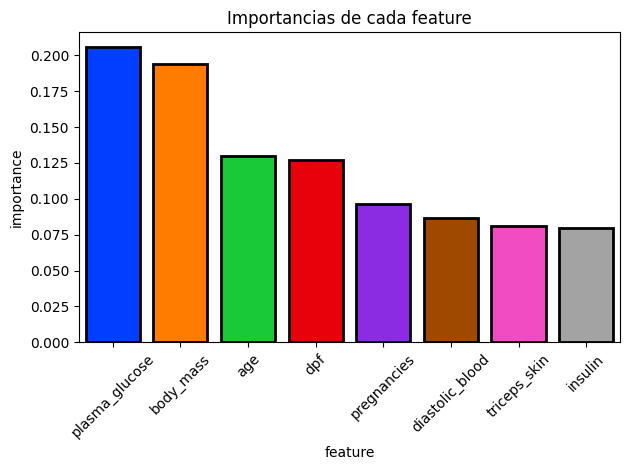

In [111]:
#Verificamos el feature importances
data = pd.DataFrame(
    {
        'feature':list(X.columns),
        'importance':random_forest.feature_importances_
    }).sort_values('importance',ascending=False)

# Mostrar

sns.barplot(
    data,
    x = data.feature,
    y=data.importance,
    saturation = 2.0,
    palette = 'bright',
    edgecolor='black',
    linewidth = 2.0
)
plt.title('Importancias de cada feature')
plt.xticks(rotation=45)
plt.tight_layout()


In [112]:
data

,feature,importance
1,plasma_glucose,0.205740
5,body_mass,0.193899
7,age,0.129633
6,dpf,0.126973
0,pregnancies,0.096289
2,diastolic_blood,0.086302
3,triceps_skin,0.081293
4,insulin,0.079870
